# Project: Investigate a Dataset - [TMDB 5000 Movie]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this part, I present a brief description about the data set that will be analyzed, which is represented in 5,000 films collected from a database (TMDB) which contains the budgets and revenues of these films and some other things.

### Questions for Analysis

1-What is the relationship between runtime and popularity based on years ?

2- Since by reviewing the data, we find that in one year many films were released, we can answer a - what are the ten most popular films based on a      specific year (and the question will be updated to compare two different years in terms of the top ten popular films). B - From here we can compare the budget and revenues of each of these films. Hence, we can answer the question: `does the budget and popularity of a single movie affect the amount of profits, or are there other things that affect`??


<a id='wrangling'></a>
## Data Wrangling

#### I will import some packages that I will need to work with the data 

In [136]:
# Importing Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [137]:
# Load Data
movies_df = pd.read_csv('tmdb_5000_movies.csv')

### Assessing Data

#### Finds the number of rows and columns in the data

In [138]:
movies_df.shape

(4803, 20)

#### Show a few lines of this data

In [139]:
movies_df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",5/19/2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",10/26/2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


#### View information about data if it contains NAN values ​​and see data types to see if anything needs to be corrected

In [140]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

#### We have some columns with NAN values, we can show the sum of NAN to see how we can handle it

In [141]:
# To show how many NAN Values in Data
movies_df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

#### We can show if there are duplicate rows in the data and if there are, we show their sum to see how we can deal with it

In [142]:
# To Show how many duplicated Rows in Data
movies_df.duplicated().sum()

0

#### We can display some statistical information about the data

In [143]:
# To show some statistical 
movies_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


### Cleaning Data

#### Since our evaluation of the data showed that there are two columns of data that contain a large amount of (NAN) and since we will not rely on them in our analysis, we can delete all of them so that they do not affect our analysis

In [144]:
# Remove some columns we don't need in the analysis
movies_df.drop(['homepage' , 'tagline'] , axis=1 , inplace=True)

In [145]:
# check this step
movies_df.shape

(4803, 18)

#### Since I will be dealing with a column (runtime) in the analysis process, I will fill the (NAN) values ​​with the average instead of omitting them so that it does not affect the parsing

In [146]:
# fill NAN in (runtime) by mean values in (runtime)
mean_runtime = movies_df['runtime'].mean()
movies_df['runtime'] = movies_df['runtime'].fillna(mean_runtime)

#### Deleting other () values ​​as their number is small and will not be relied upon in the analysis

In [147]:
# removing all NAN in another columns
movies_df.dropna(inplace= True)

#### Verifies that all (NAN) values ​​have been processed

In [148]:
# check is here any NAN Values
movies_df.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

#### Work to verify that these columns (budget & revenue) do not contain zero values ​​so that they do not affect the analysis

In [149]:
# To check that Revenue and Budget have values ​​of zero and remove them if they are here
movies_df.drop(movies_df.index[movies_df['budget'] == 0] , inplace=True)
movies_df.drop(movies_df.index[movies_df['revenue'] == 0] , inplace=True)

#### Convert the data type inside a column (runtime) to (int) so that the analysis outputs are more accurate

In [150]:
# convert 'runtime' from float to int
movies_df['runtime'] = movies_df['runtime'].astype(int)

In [151]:
# to check about this
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3229 entries, 0 to 4798
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3229 non-null   int64  
 1   genres                3229 non-null   object 
 2   id                    3229 non-null   int64  
 3   keywords              3229 non-null   object 
 4   original_language     3229 non-null   object 
 5   original_title        3229 non-null   object 
 6   overview              3229 non-null   object 
 7   popularity            3229 non-null   float64
 8   production_companies  3229 non-null   object 
 9   production_countries  3229 non-null   object 
 10  release_date          3229 non-null   object 
 11  revenue               3229 non-null   int64  
 12  runtime               3229 non-null   int32  
 13  spoken_languages      3229 non-null   object 
 14  status                3229 non-null   object 
 15  title                

#### Convert the data in column (release_date) to (datetime) so that it makes more sense and I will need it in the analysis process

In [152]:
# convert release_date from object to datetime
movies_df['release_date'] = movies_df['release_date'].astype(np.datetime64)

<a id='eda'></a>
## Exploratory Data Analysis

## View some charts

array([[<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>],
       [<AxesSubplot:title={'center':'release_date'}>,
        <AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'vote_count'}>, <AxesSubplot:>]],
      dtype=object)

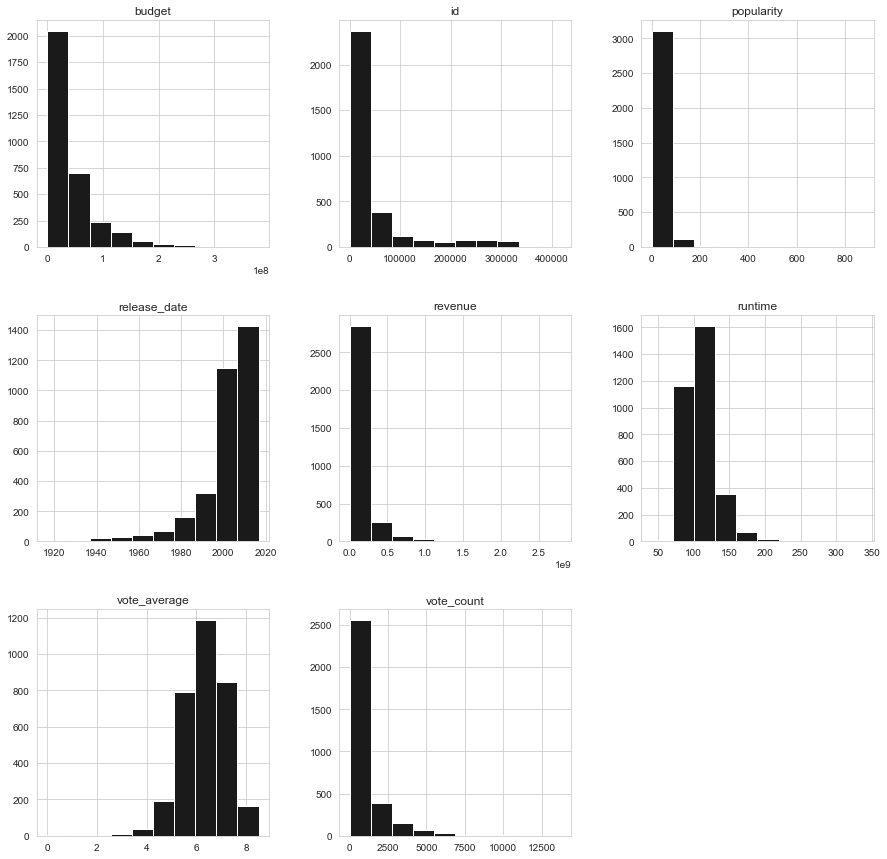

In [153]:
movies_df.hist(figsize=( 15,15))

#### Column (id) will be deleted as it will not be used in the analysis process

In [154]:
# Deleting the id column will not be needed in the analysis
movies_df.drop(['id'] , axis= 1 , inplace=True)

#### A new data column will be created containing only the years in the (release_date) column.

In [155]:
# We can add a new column containing the year without the months and days to help us with this analyz
movies_df['year'] = movies_df['release_date'].dt.year
movies_df['year']

0       2009
1       2007
2       2015
3       2012
4       2012
        ... 
4773    1994
4788    1972
4792    1997
4796    2004
4798    1992
Name: year, Length: 3229, dtype: int64

In [156]:
# show some statistic
movies_df.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,year
count,3.229000e+03,3229.000000,3.229000e+03,3229.000000,3229.000000,3229.000000,3229.000000
mean,4.065444e+07,29.033689,1.212430e+08,110.724373,6.309353,977.287395,2001.680396
std,4.439674e+07,36.165730,1.863029e+08,20.965694,0.873891,1414.309577,13.279525
min,1.000000e+00,0.019984,5.000000e+00,41.000000,0.000000,0.000000,1916.000000
25%,1.050000e+07,10.446722,1.700000e+07,96.000000,5.800000,178.000000,1998.000000
50%,2.500000e+07,20.410354,5.518472e+07,107.000000,6.300000,471.000000,2005.000000
75%,5.500000e+07,37.335721,1.462920e+08,121.000000,6.900000,1148.000000,2010.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,8.500000,13752.000000,2016.000000


array([[<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'release_date'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_average'}>],
       [<AxesSubplot:title={'center':'vote_count'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>]],
      dtype=object)

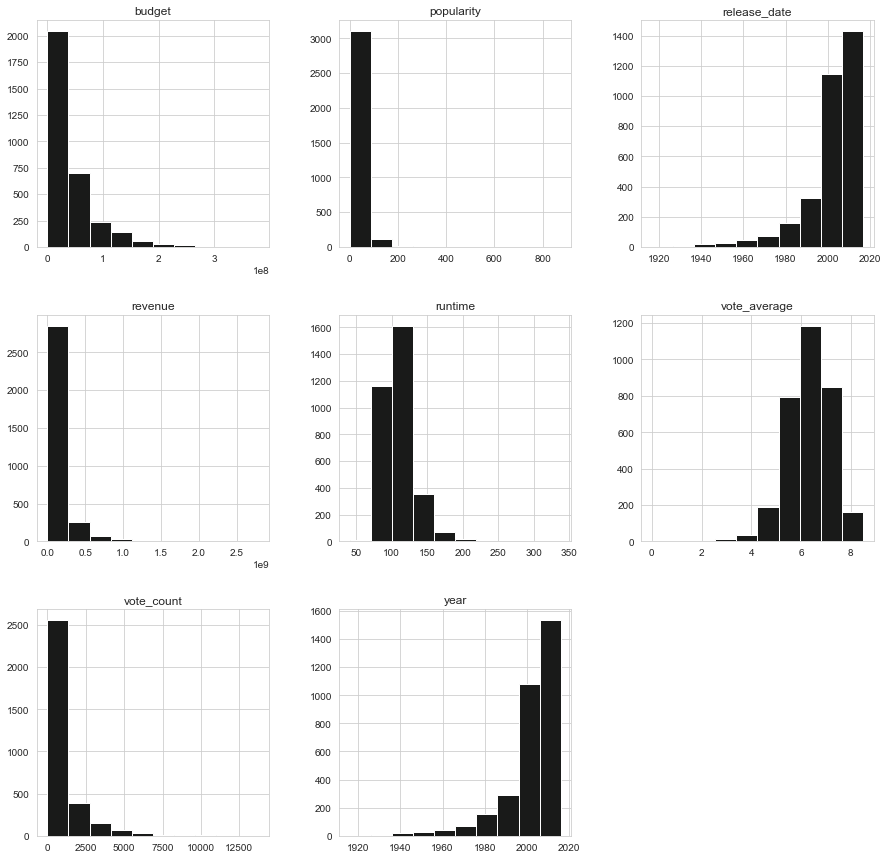

In [157]:
# To check it
movies_df.hist(figsize=( 15,15))

#### `Question One`: 1-What is the relationship between runtime and popularity based on years ?

In [158]:
def toshow_relation_between_runtime_popularity(Year):
    """
Description of the function summary:
This function take specific year as argument then return the relation between..... and ......

Inputs:
Year ----> if (Year) in our data,function can run and return the relation 

Outputs:
Display the relation between ...... and .......
"""    
    # making year column as a groups
    group_all_years = movies_df.groupby('year' ,  as_index = True)

    # To Take One Group From all Groups   
    specific_Year = group_all_years.get_group(Year)
    #(Automating Figures From Data)
    for Year in specific_Year: 
        if Year in specific_Year:
            sns.relplot(x='runtime' , y='popularity' , data=specific_Year , kind = 'scatter', hue='revenue' , size= 'revenue').set(title = 'Comparison between popularity & runtime')
            break
    plt.show()    

#### When this function is called, it displays a comparison between the runtime of the movie and its popularity based on the budget in a certain period

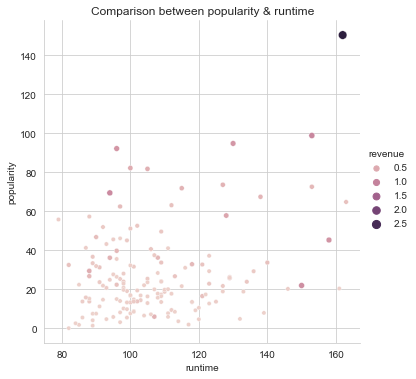

In [159]:
toshow_relation_between_runtime_popularity(2009)

####  Question_Two `does the budget and popularity of a single movie affect the amount of profits, or are there other things that affect`

#####  part One - Question_Two

In [160]:
# to rank the popularity column ,to use in first plot 
sorted_movies_df_popularity_1 = movies_df.sort_values(by=['popularity'], ascending=False)
#to rank the popularity column ,to use in Second plot 
sorted_movies_df_popularity_2 = movies_df.sort_values(by=['popularity'], ascending=False)
def Top_10_movies_popularity(any_year_1, any_year_2):
    """
Description of the function summary:
This function does the part that searches for the 10 most popular movies in two distinct years and then shows them in a (tape)

Inputs:
any_year_1 ----> It is the year that will be used to find the names of the ten most popular films
any_year_2 ----> The second year will be used to calculate the same

Outputs:
Display the names of the top ten popular films based on the years that have been identified and put them in a picture (bar)
"""
    #Inquiry to ensure that the specified year is available to us
    sorted_movies_df_popularity_1.query('year == @any_year_1' , inplace=True)
    # doing First Plot
    fig,ax = plt.subplots()
    #(Automating Figures From Data) 
    for i in sorted_movies_df_popularity_1['year']: 
        ax.bar(sorted_movies_df_popularity_1['title'].head(10), sorted_movies_df_popularity_1['popularity'].head(10))
        ax.set_xticklabels(sorted_movies_df_popularity_1['title'] ,rotation= 90)
        ax.set_xlabel('Names_Of_Films')
        ax.set_ylabel('Popularity_Of_Films')
        ax.set_title('Top 10 Films have High Popularity In:'+ str(any_year_1), pad =25)
        plt.show()  
    #Inquiry to ensure that the specified year is available to us    
    sorted_movies_df_popularity_2.query('year == @any_year_2' , inplace=True)
    # doing Second Plot 
    fig,ax = plt.subplots()
    #(Automating Figures From Data)
    for i_2 in sorted_movies_df_popularity_2['year']:
        ax.bar(sorted_movies_df_popularity_2['title'].head(10), sorted_movies_df_popularity_2['popularity'].head(10))
        ax.set_xticklabels(sorted_movies_df_popularity_2['title'] ,rotation= 90)
        ax.set_xlabel('Names_Of_Films')
        ax.set_ylabel('Popularity_Of_Films')
        ax.set_title('Top 10 Films have High Popularity In:' + str(any_year_2),pad =25)
        plt.show() 


#### When we call this function, it displays the names of the ten most popular films in a specific year. Then a section was added to it to show the ten  most popular films, but in another year so that we can compare between two different years.
#### For example, here will be shown the top ten most popular films of 2016 and 2015

<ipython-input-160-f3ad035643e6>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sorted_movies_df_popularity_1['title'] ,rotation= 90)


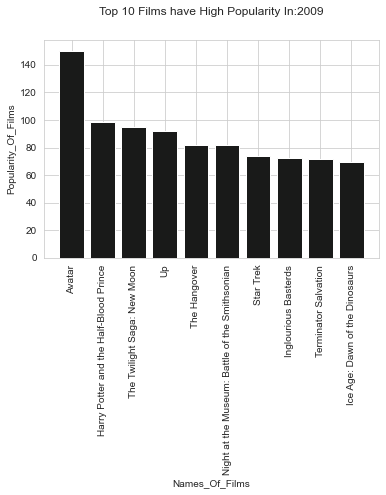

<ipython-input-160-f3ad035643e6>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sorted_movies_df_popularity_2['title'] ,rotation= 90)


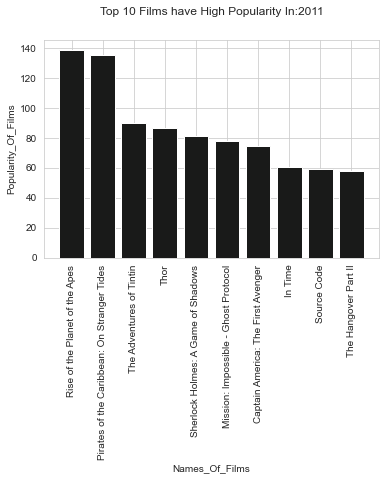

In [161]:
# To call this function
Top_10_movies_popularity(2009,2011)

#### Here we can see that the highest popular movie in 2016 is (Deadpool) 
#### and the highest popular movie in 2015 is (Mnions)

##### part Two - Question_two

In [162]:
sorted_movies_df_popularity_11 = movies_df.sort_values(by=['popularity'], ascending=False)
sorted_movies_df_popularity_22 = movies_df.sort_values(by=['popularity'], ascending=False)


def budget_revenue_for_specific_movies_on_specific_year(year_one , year_two):
    """
Description of the function summary:
This function, when called, displays the budget and profits of films extracted from the
(Top_10_movies_popularity) function, displays the results in the form of (scatter)

Inputs:
year_one ---->It is a small group that is accessed within the groups that were created in the year column,
              and depending on it, we will display the first plot.
year_two ---->It is a small group that is accessed within the groups that were created in the year column,
              and depending on it, we will display the Second Plot.

Output:
Chart comparing the budget and revenues of the top ten most popular films            
"""

    # test thing
    sorted_movies_df_popularity_11.query('year == @year_one' , inplace= True)
    

    # Creating Groupby From year-Column
    group_of_years = movies_df.groupby('year' ,  as_index = True)
    # To Take One Group From all Groups
    specific_year_one = group_of_years.get_group(year_one)
    # To Take One Group From all Groups
    specific_year_two = group_of_years.get_group(year_two)
    # To Creat Plot
    fig,ax = plt.subplots()
    # (Automating Figures From Data)     
    for year in specific_year_one:
        ax.scatter(sorted_movies_df_popularity_11['title'].head(10),specific_year_one['budget'].head(10),alpha = 0.5,color = 'r')
        ax.set_xlabel('Relation between revenue & Budget on Specific Year')
        ax.set_ylabel('Budget For This Year')
        ax.set_title('Relation Between Budget and Revenue For Top 10 Movies Popularity In: '+ str(year_one) ,pad = 25)
        ax.set_xticklabels(sorted_movies_df_popularity_11['title'], rotation=90)
        # To Show revenue in The Same Fig
        ax2=ax.twinx()

        ax2.scatter(sorted_movies_df_popularity_11['title'].head(10),specific_year_one['revenue'].head(10), alpha = 0.7, color = 'g',label = 'Revenue')
        ax2.set_ylabel('Revenue For This Year')
        ax2.legend()
        plt.show()
        
        
     # To Creat Second Plot
    fig,ax = plt.subplots()
    #(Automating Figures From Data)
    # test thing
    sorted_movies_df_popularity_22.query('year == @year_two' , inplace=True)
    
    for year in specific_year_two:
        ax.scatter(sorted_movies_df_popularity_22['title'].head(10),specific_year_two['budget'].head(10),alpha = 0.5,color = 'r')
        ax.set_xlabel('Relation between revenue & Budget on Specific Year')
        ax.set_ylabel('Budget For This Year')
        ax.set_title('Relation Between Budget and Revenue For Top 10 Movies Popularity In: '+ str(year_two),pad =25)
        ax.set_xticklabels(sorted_movies_df_popularity_22['title'], rotation=90)

        # To Show revenue in The Same Fig
        ax2=ax.twinx()
        ax2.scatter(sorted_movies_df_popularity_22['title'].head(10),specific_year_two['revenue'].head(10), alpha = 0.7, color = 'g',label = 'Revenue')
        ax2.set_ylabel('Revenue For This Year')
        ax2.legend()
        plt.show()   
    


<ipython-input-162-e7357cb3bb82>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sorted_movies_df_popularity_11['title'], rotation=90)


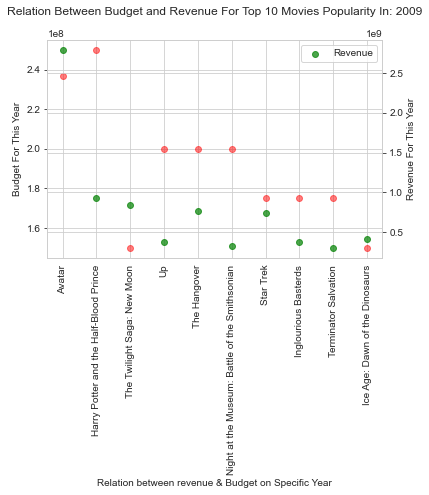

<ipython-input-162-e7357cb3bb82>:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sorted_movies_df_popularity_22['title'], rotation=90)


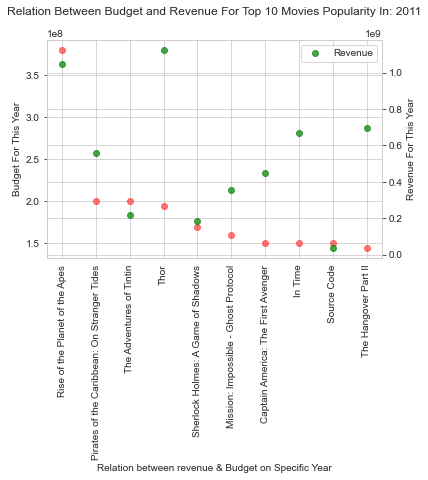

In [163]:
budget_revenue_for_specific_movies_on_specific_year(2009,2011)

##### Through the presentation that appears in front of us, we can say that the relationship between budget and profits is not a positive relationship, as we see in the first figure, the movie (Deadpool) was very popular, but its revenues did not cover the budget that was set for it

##### Likewise in the second figure, where we see that the ten films that had a higher popularity than other films, most of them did not achieve revenues that covered the budget set

##### when we call the function ---> `budget_revenue_for_specific_movies_on_specific_year( , )` and give it two different years it will work to display budget and revenue based on the first year and second year we give it the parameter and it works to display each year in the different plot.

##### What we can conclude from ( ` Top_10_movies_popularity( , )` ) and ( ` budget_revenue_for_specific_movies_on_specific_year( , )` ) is that there are factors other than the popularity of the film and other than its budget that affect its earnings 


##### when wegive the function `budget_revenue_for_specific_movies_on_specific_year( , )` The same parameter we give it to the function `Top_10_movies_popularity( , )` we can show top ten movies have popularity and the budget, revenue for this movies

`Tip`
##### and when we can dont give the function `budget_revenue_for_specific_movies_on_specific_year( , )` and `budget_revenue_for_specific_movies_on_specific_year( , )` the same years and will each function work correctly

<a id='conclusions'></a>
## Conclusions

--> The data set related to films was analyzed, as through observation and exploration, we found that the popularity of the film is not positively correlated with its budget.

--> In addition, the relationship between budget and profits is not a direct relationship,

--> as it appears from the analysis that the increase in profits is not related to the increase in the budget of the film.

###  `Limitations`
  we dropped some rows maybe will affect on insights bud dont worry this is only about 5 columns
 
